# Voxel preparation

Runs in bkg and signal data files, 

Centers every event at origin

Labels class, segclass, ext and provides a unique index (idx) to the events

Group the voxels event data in bunches. For each bunch of events there is a h5 file. Files are ordered with increased index of events.

**J. A. Hernando 02/08/2024**


In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

In [3]:
import xyimg.voxelsprep as vp
import xyimg.dataprep   as dp


## Debug

In [4]:
df1 = pd.DataFrame({'file_id':[1, 1, 2, 2], 'event':[0, 1, 2, 3], 'E':[10, 11, 12, 13]})
df2 = pd.DataFrame({'file_id':[1, 1, 2, 2], 'event':[0, 1, 2, 3], 'E':[20, 21, 22, 23]})
dfs = [df1, df2]

In [5]:
gs = [x.groupby(['file_id', 'event']) for x in dfs]

In [6]:
keys = vp.get_keys(gs)
print(keys)

[(0, (1, 0)), (0, (1, 1)), (0, (2, 2)), (0, (2, 3)), (1, (1, 0)), (1, (1, 1)), (1, (2, 2)), (1, (2, 3))]


In [7]:
for ievt, evt in vp.evt_iter(gs, nevents = 2, shuffle = True):
    print(ievt, evt)

(1, (1, 1))    file_id  event   E
1        1      1  21
(1, (1, 0))    file_id  event   E
0        1      0  20
(0, (1, 0))    file_id  event   E
0        1      0  10
(0, (1, 1))    file_id  event   E
1        1      1  11


## Voxels-Code Debug

In [8]:
ipath = os.environ['LPRDATADIR']

pressure  = '5bar'
sample    = '1eroi'

bkgfilename = vp.filename_voxel(pressure, '1eroi')
sigfilename = vp.filename_voxel(pressure, '0nubb') 

In [9]:
df1 = pd.read_hdf(ipath + bkgfilename, 'voxels')
df2 = pd.read_hdf(ipath + sigfilename, 'voxels')

In [10]:
dfs = [df1, df2]
gs  = [df.groupby(['file_id', 'event']) for df in dfs]

In [11]:
from sys import getsizeof
print(f"data size {getsizeof(gs[0])/1e6} Mb")

data size 4.8e-05 Mb


In [12]:
nevents = 5
shuffle = True
_int = lambda x : int(x.unique())
for i, ievt in enumerate(vp.evt_iter(gs, nevents, shuffle)):
    idevt, evt = ievt
    print('>>> Event ', i, idevt)
    print('number of voxels ', len(evt), ', file id', _int(evt['file_id']),
          ', event ', _int(evt['event']), ', class ', _int(evt['binclass']))

>>> Event  0 (1, (1, 3))
number of voxels  347 , file id 1 , event  3 , class  1
>>> Event  1 (0, (1, 2))
number of voxels  447 , file id 1 , event  2 , class  0
>>> Event  2 (0, (1, 4))
number of voxels  463 , file id 1 , event  4 , class  0
>>> Event  3 (0, (1, 3))
number of voxels  498 , file id 1 , event  3 , class  0
>>> Event  4 (1, (1, 0))
number of voxels  396 , file id 1 , event  0 , class  1
>>> Event  5 (0, (1, 1))
number of voxels  434 , file id 1 , event  1 , class  0
>>> Event  6 (1, (1, 1))
number of voxels  396 , file id 1 , event  1 , class  1
>>> Event  7 (0, (1, 0))
number of voxels  490 , file id 1 , event  0 , class  0
>>> Event  8 (1, (1, 2))
number of voxels  427 , file id 1 , event  2 , class  1
>>> Event  9 (1, (1, 4))
number of voxels  429 , file id 1 , event  4 , class  1


In [13]:
ifiles    = [ipath + bkgfilename, ipath + sigfilename]
ofile     = 'vptemp.h5'
nbunch    =  100
nevents   = 1000
shuffle   = True
vp.run(ifiles, ofile, shuffle, nbunch, nevents)

input  filename       ['/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5', '/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_0nubb.h5']
output filename       vptemp.h5
shuffle               True
nbunch                100
events                1000
processed event  0 , id  (0, (15, 31))
proceesed bunch  0
events in the bunch  100
saved processed bunch data at: vptemp_bunch0.h5
processed event  100 , id  (0, (11, 23))
proceesed bunch  1
events in the bunch  100
saved processed bunch data at: vptemp_bunch1.h5
processed event  200 , id  (0, (1, 12))
proceesed bunch  2
events in the bunch  100
saved processed bunch data at: vptemp_bunch2.h5
processed event  300 , id  (1, (2, 381))
proceesed bunch  3
events in the bunch  100
saved processed bunch data at: vptemp_bunch3.h5
processed event  400 , id  (0, (15, 40))
proceesed bunch  4
events in the bunch  100
saved processed bunch data at: vptemp_bunch4.h5
processed event  500 , id  (1, (2, 402))
proceesed 

In [29]:
root = '/home/jahernando/NEXT/software/nextnn/vptemp/vptemp_bunch*.h5'
evtdispatch = dp.EvtDispatch(root)

number of files  20
setting file  19
setting file  0


In [30]:
print('total events ', len(evtdispatch))

total events  2000


In [31]:
evtdispatch.bins

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])

In [81]:
slabel = 'xy_segclass_max', 'yz_segclass_max', 'zx_segclass_max'
width =  10
frame = 150
imgdisps = dp.ImgDispach(evtdispatch, slabel, width, frame)
elabel = 'xy_E_sum', 'yz_E_sum', 'zx_E_sum'
imgdispe = dp.ImgDispach(evtdispatch, elabel, width, frame)


In [76]:
import random
index = random.choice(range(len(evtdispatch)))
print(index)
evt   = evtdispatch[index]

969
9
setting file  9


In [77]:
evt

,file_id,event,x,y,z,E,binclass,segclass,track_id,nhits,ext,idx
20189,1,45,-30.413889,28.663889,-52.380556,0.004401,0,1,0,1,1,969
20190,1,45,-30.413889,28.663889,-51.380556,0.002604,0,1,0,2,1,969
20191,1,45,-30.413889,28.663889,-50.380556,0.011452,0,1,0,2,1,969
20192,1,45,-30.413889,29.663889,-53.380556,0.005607,0,1,0,3,1,969
20193,1,45,-30.413889,29.663889,-52.380556,0.001708,0,1,0,1,1,969
...,...,...,...,...,...,...,...,...,...,...,...,...
20552,1,45,36.586111,-7.336111,-22.380556,0.007642,0,2,4,7,1,969
20553,1,45,36.586111,-7.336111,-21.380556,0.008280,0,2,4,20,1,969
20554,1,45,38.586111,-10.336111,-22.380556,0.008598,0,2,3,7,1,969
20555,1,45,38.586111,-10.336111,-21.380556,0.017086,0,2,3,14,1,969


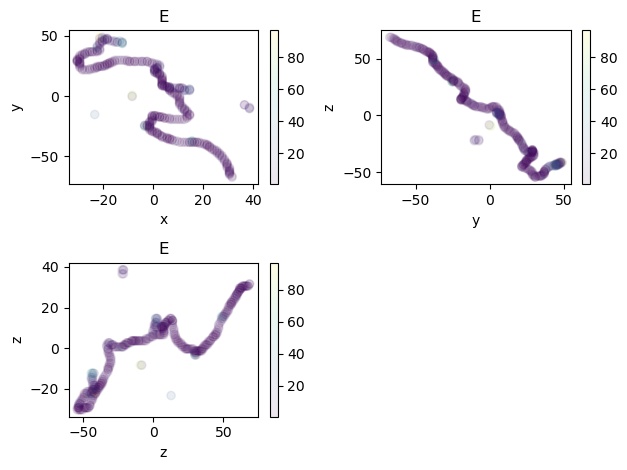

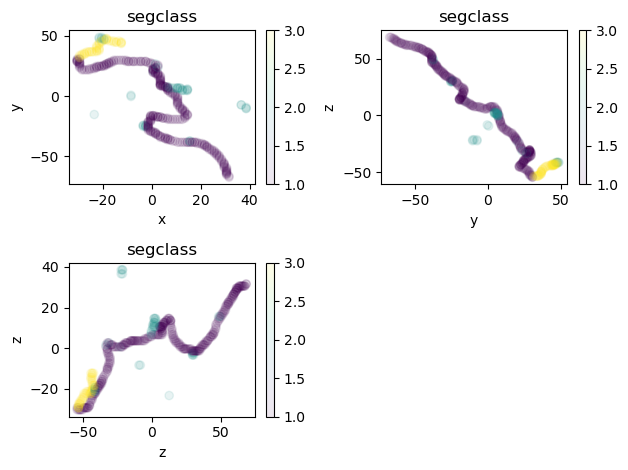

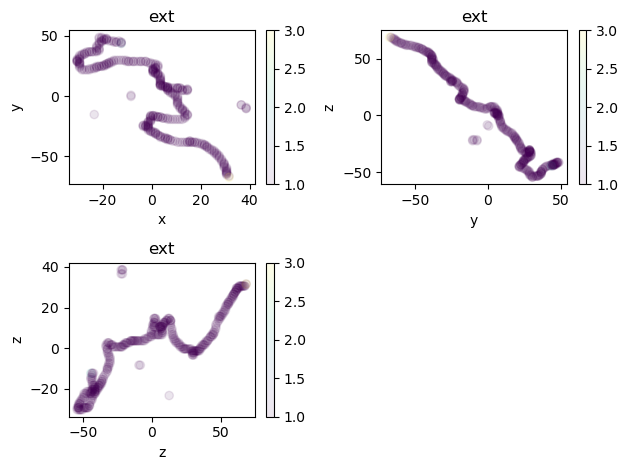

In [78]:
vp.scatter_evt(evt, 1e3*evt.E, 'E')
vp.scatter_evt(evt, evt.segclass, 'segclass')
vp.scatter_evt(evt, evt.ext, 'ext')

In [79]:
vp.test_evt_preparation(evt)

True

9
target  0
9
target  0


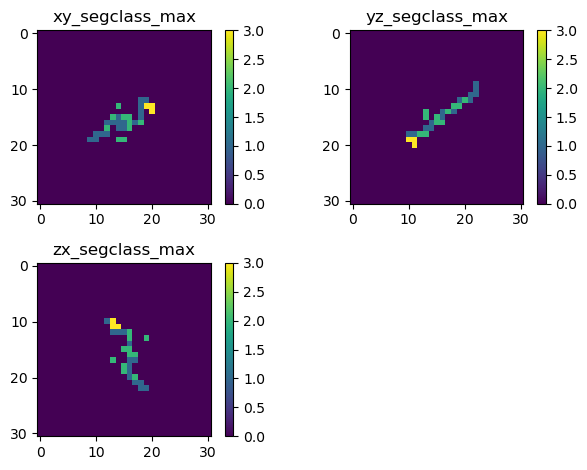

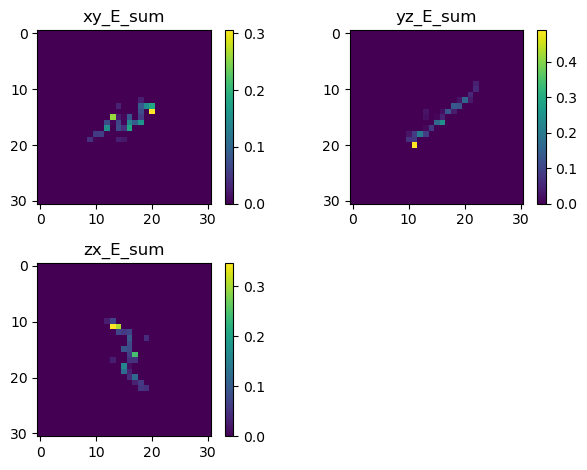

In [82]:
x, y = imgdisps[index]
dp.plot_img(x, y, slabel)
x, y = imgdispe[index]
dp.plot_img(x, y, elabel)

In [85]:
import xyimg.cnn as cnn

In [105]:
imgdataset = cnn.ImgDataset(imgdispe)

In [106]:
type(imgdataset)

xyimg.cnn.ImgDataset

In [107]:
len(imgdataset)

2000

In [108]:
x, y = imgdataset[index]

9


target  0


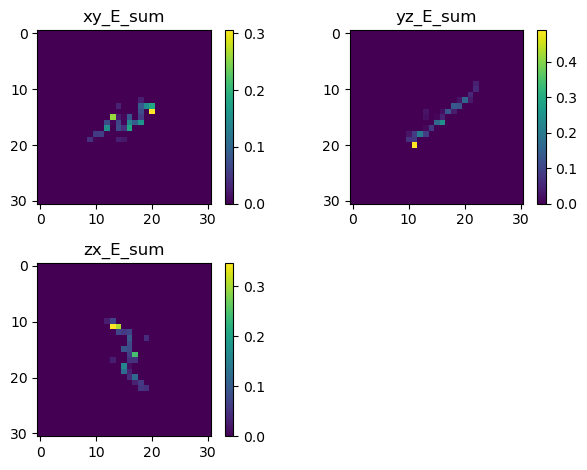

In [110]:
xn = x.numpy()
yn = y.numpy()
dp.plot_img(xn, yn, elabel)

In [84]:
np.sum(x[0]), np.sum(x[1]), np.sum(x[1])

(2.457999997232946, 2.457999997232946, 2.457999997232946)

In [60]:
label = 'xy_E_sum', 'yz_E_sum', 'zx_E_sum'
width =  2.5
frame = 150
imgdispE = dp.ImgDispach(evtdispatch, label, width, frame)
x, y = imgdispatch[index]

In [ ]:
root = root = '/home/jahernando/NEXT/software/nextnn/vptemp/vptemp_bunch*.h5'
evtdispatch = dp.EvtDispatch()

In [68]:
len(evt)

0

In [57]:
bins = np.linspace(0, len(cc), 5, endpoint = True, dtype = int)

In [60]:
np.digitize(10, bins)

3

In [49]:
d0 = pd.read_hdf(cc.root.replace('*', str(0)), 'voxels')


In [50]:
d0['idx'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
np.arange(cc.nbunches * cc.nevents)